#Relationship between Cancer Deaths and Hospice Care Data in Tennessee Counties Project

Setup Juptyer for Pandas Python Package and Associated Commands

In [2]:
import pandas as pd

#Import and Clean Data

##First set of data is Hospice Facilities across USA from CMS  
https://healthdata.gov/dataset/hospice-general-information

In [128]:
hospice_df = pd.read_csv('data/Hospice_General_Information.csv')
hospice_df.head(2)

,CMS Certification Number (CCN),Facility Name,Address Line 1,Address Line 2,City,State,Zip Code,County Name,PhoneNumber,CMS Region,Ownership Type,Certification Date
0,11500,BAPTIST HOSPICE,301 INTERSTATE PARK,NaN,MONTGOMERY,AL,36109,Montgomery,(334) 395-5000,4,Other,03/23/1984
1,11501,SOUTHERNCARE NEW BEACON N. BIRMINGHAM,"4735 NORREL DRIVE, SUITE 129",NaN,TRUSSVILLE,AL,35173,Jefferson,(205) 939-8799,4,For-Profit,05/24/1984


Query data file for TN related data and replace hospice_df with only the TN data

In [129]:
hospice_df = hospice_df.loc[hospice_df.State == 'TN']
hospice_df.head(2)

,CMS Certification Number (CCN),Facility Name,Address Line 1,Address Line 2,City,State,Zip Code,County Name,PhoneNumber,CMS Region,Ownership Type,Certification Date
2889,441501,ALIVE HOSPICE INC,1718 PATTERSON ROAD,NaN,NASHVILLE,TN,37203,Davidson,(615) 327-1085,4,Non-Profit,04/10/1984
2890,441502,METHODIST ALLIANCE HOSPICE,"6400 SHELBY VIEW DRIVE, SUITE 101",NaN,MEMPHIS,TN,38134,Shelby,(901) 516-1600,4,Non-Profit,08/31/1984


Variable names need relabeling to avoid spaces in names and to simplify calling the columns in future commands

In [130]:
# Facility Name, Address Line 1, City, State, County Name, CMS Region, Ownership Type, and Cerfification Date
# Make lowercase and remove spaces
hospice_df.columns = ['ccn', 'facility', 'address', 'address2', 'city', 'state', 'zip', 'county', 'phone', 'region', 'owner_type', 'cert_date']
hospice_df.head(2)

,ccn,facility,address,address2,city,state,zip,county,phone,region,owner_type,cert_date
2889,441501,ALIVE HOSPICE INC,1718 PATTERSON ROAD,NaN,NASHVILLE,TN,37203,Davidson,(615) 327-1085,4,Non-Profit,04/10/1984
2890,441502,METHODIST ALLIANCE HOSPICE,"6400 SHELBY VIEW DRIVE, SUITE 101",NaN,MEMPHIS,TN,38134,Shelby,(901) 516-1600,4,Non-Profit,08/31/1984


Drop variable columns that are of no interest

In [131]:
hospice_df.drop(columns = ['ccn', 'address2', 'zip', 'phone' ], inplace = True)
hospice_df.head(2)

,facility,address,city,state,county,region,owner_type,cert_date
2889,ALIVE HOSPICE INC,1718 PATTERSON ROAD,NASHVILLE,TN,Davidson,4,Non-Profit,04/10/1984
2890,METHODIST ALLIANCE HOSPICE,"6400 SHELBY VIEW DRIVE, SUITE 101",MEMPHIS,TN,Shelby,4,Non-Profit,08/31/1984


In [132]:
print('top: ', hospice_df.head())
print('--------------------------')
print('bottom: ', hospice_df.tail())

top:                                  facility                            address  \
2889                   ALIVE HOSPICE INC                1718 PATTERSON ROAD   
2890          METHODIST ALLIANCE HOSPICE  6400 SHELBY VIEW DRIVE, SUITE 101   
2891          HOSPICE OF CHATTANOOGA INC                 4411 OAKWOOD DRIVE   
2892               AMEDISYS HOSPICE CARE          6570 STAGE ROAD SUITE 110   
2893  NORTHCREST HOME HEALTH AND HOSPICE               212 NORTHCREST DRIVE   

             city state     county  region  owner_type   cert_date  
2889    NASHVILLE    TN   Davidson       4  Non-Profit  04/10/1984  
2890      MEMPHIS    TN     Shelby       4  Non-Profit  08/31/1984  
2891  CHATTANOOGA    TN   Hamilton       4  Non-Profit  06/30/1986  
2892     BARTLETT    TN     Shelby       4  For-Profit  02/09/1987  
2893  SPRINGFIELD    TN  Robertson       4       Other  07/13/1987  
--------------------------
bottom:                                    facility                        add

In [133]:
#print the dimensions of the data
hospice_df.shape

(56, 8)

Save cleaned Hospice data from TN only to CSV file

In [134]:
hospice_df.to_csv('hospice_df_clean.csv')

##Read in cancer deaths data from National Cancer Institute  
https://statecancerprofiles.cancer.gov/deathrates/index.php?stateFIPS=47&cancer=001&race=00&sex=0&age=001&type=death&sortVariableName=rate&sortOrder=default#results

Note, we skipped the first 4 rows as a look at the data file in a text editor showed that the first few lines lacked the relevant information

In [123]:
cancer_df = pd.read_csv('data/cancer_deaths.csv', skiprows=4, nrows = 97)
cancer_df.head()

,County,FIPS,Met Healthy People Objective of 161.4?,"Age-Adjusted Death Rate - deaths per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend in Death Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,Tennessee,47999,No,185.4,184.0,186.8,13933,falling,-1.4,-1.5,-1.2
1,United States,0,No,163.5,163.3,163.7,586354,falling,-1.5,-1.6,-1.5
2,Trousdale County,47169,No,265.5,219.0,319.1,24,stable,0.0,-1.3,1.3
3,Scott County,47151,No,241.0,214.5,270.0,63,stable,-0.5,-1.1,0.1
4,Cheatham County,47021,No,239.6,217.8,263.0,97,stable,-0.6,-1.4,0.3


In [124]:
cancer_df.tail()

,County,FIPS,Met Healthy People Objective of 161.4?,"Age-Adjusted Death Rate - deaths per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend in Death Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
92,Van Buren County,47175,Yes,160.3,122.7,207.4,14,stable,-0.9,-2.4,0.6
93,Pickett County,47137,Yes,158.7,123.3,203.9,15,stable,-0.5,-1.8,0.9
94,Fayette County,47047,Yes,154.3,139.1,170.7,81,falling,-1.4,-2.2,-0.5
95,Williamson County,47187,Yes,127.2,119.8,134.9,239,falling,-3.8,-4.8,-2.9
96,Moore County,47127,Yes,123.2,93.9,160.5,12,falling,-2.1,-3.8,-0.4


In [125]:
cancer_df.shape

(97, 11)

In [126]:
# Make lowercase and remove spaces
cancer_df.columns = ['county', 'fips', 'met_healthy_people_obj', 'age_adjust_death_rate', 'death_lower_95_CI', 'death_upper_95_CI', 'avg_ann_count', 'recent_trend', 'recent_5yr_trend', '5yr_lower_95_CI', '5yr_upper_95_CI']
cancer_df.head(2)

,county,fips,met_healthy_people_obj,age_adjust_death_rate,death_lower_95_CI,death_upper_95_CI,avg_ann_count,recent_trend,recent_5yr_trend,5yr_lower_95_CI,5yr_upper_95_CI
0,Tennessee,47999,No,185.4,184.0,186.8,13933,falling,-1.4,-1.5,-1.2
1,United States,0,No,163.5,163.3,163.7,586354,falling,-1.5,-1.6,-1.5


In [127]:
cancer_df.to_csv('cancer_df_modified.csv')

In [21]:
pop_df = pd.read_csv('data/PEP_2017_PEPAGESEX.csv')
pop_df.head()

,GEO.id,GEO.id2,GEO.display-label,cen42010sex0_age999,cen42010sex1_age999,cen42010sex2_age999,est42010sex0_age999,est42010sex1_age999,est42010sex2_age999,est72010sex0_age999,...,est72014sex2_medage,est72015sex0_medage,est72015sex1_medage,est72015sex2_medage,est72016sex0_medage,est72016sex1_medage,est72016sex2_medage,est72017sex0_medage,est72017sex1_medage,est72017sex2_medage
0,Id,Id2,Geography,"April 1, 2010 - Census - Both Sexes; Total","April 1, 2010 - Census - Male; Total","April 1, 2010 - Census - Female; Total","April 1, 2010 - Estimates Base - Both Sexes; T...","April 1, 2010 - Estimates Base - Male; Total","April 1, 2010 - Estimates Base - Female; Total",Population Estimate (as of July 1) - 2010 - Bo...,...,Population Estimate (as of July 1) - 2014 - Fe...,Population Estimate (as of July 1) - 2015 - Bo...,Population Estimate (as of July 1) - 2015 - Ma...,Population Estimate (as of July 1) - 2015 - Fe...,Population Estimate (as of July 1) - 2016 - Bo...,Population Estimate (as of July 1) - 2016 - Ma...,Population Estimate (as of July 1) - 2016 - Fe...,Population Estimate (as of July 1) - 2017 - Bo...,Population Estimate (as of July 1) - 2017 - Ma...,Population Estimate (as of July 1) - 2017 - Fe...
1,0500000US47001,47001,"Anderson County, Tennessee",75129,36308,38821,75094,36288,38806,75112,...,44.8,43.3,41.4,44.8,43.3,41.5,45.1,43.2,41.2,45.0
2,0500000US47003,47003,"Bedford County, Tennessee",45058,22357,22701,45056,22356,22700,45086,...,38.4,37.2,35.9,38.5,37.5,36.2,38.8,37.5,36.2,38.9
3,0500000US47005,47005,"Benton County, Tennessee",16489,8073,8416,16491,8074,8417,16511,...,48.3,46.6,45.2,48.0,47.1,45.7,48.4,47.4,46.0,48.7
4,0500000US47007,47007,"Bledsoe County, Tennessee",12876,6964,5912,12872,6962,5910,12882,...,46.3,43.4,41.7,46.5,43.5,41.9,46.4,43.9,42.1,47.3


In [22]:
pop_df.tail()

,GEO.id,GEO.id2,GEO.display-label,cen42010sex0_age999,cen42010sex1_age999,cen42010sex2_age999,est42010sex0_age999,est42010sex1_age999,est42010sex2_age999,est72010sex0_age999,...,est72014sex2_medage,est72015sex0_medage,est72015sex1_medage,est72015sex2_medage,est72016sex0_medage,est72016sex1_medage,est72016sex2_medage,est72017sex0_medage,est72017sex1_medage,est72017sex2_medage
91,0500000US47181,47181,"Wayne County, Tennessee",17021,9402,7619,17027,9404,7623,16987,...,45.8,42.6,39.8,46.5,42.7,39.9,46.7,43.1,40.0,47.4
92,0500000US47183,47183,"Weakley County, Tennessee",35021,17159,17862,35015,17157,17858,35042,...,39.2,37.6,36.0,39.2,37.9,36.2,39.6,38.3,36.6,40.1
93,0500000US47185,47185,"White County, Tennessee",25841,12640,13201,25836,12637,13199,25821,...,44.0,42.7,41.0,44.2,42.8,41.2,44.3,42.8,41.3,44.4
94,0500000US47187,47187,"Williamson County, Tennessee",183182,89336,93846,183252,89371,93881,184130,...,39.7,39.0,38.2,39.7,39.0,38.3,39.7,39.0,38.3,39.7
95,0500000US47189,47189,"Wilson County, Tennessee",113993,55834,58159,114057,55863,58194,114677,...,41.1,40.2,39.2,41.1,40.0,39.0,40.9,39.9,39.0,40.8


In [23]:
pop_df.shape

(96, 993)

In [24]:
 list(pop_df.columns.values)

['GEO.id',
 'GEO.id2',
 'GEO.display-label',
 'cen42010sex0_age999',
 'cen42010sex1_age999',
 'cen42010sex2_age999',
 'est42010sex0_age999',
 'est42010sex1_age999',
 'est42010sex2_age999',
 'est72010sex0_age999',
 'est72010sex1_age999',
 'est72010sex2_age999',
 'est72011sex0_age999',
 'est72011sex1_age999',
 'est72011sex2_age999',
 'est72012sex0_age999',
 'est72012sex1_age999',
 'est72012sex2_age999',
 'est72013sex0_age999',
 'est72013sex1_age999',
 'est72013sex2_age999',
 'est72014sex0_age999',
 'est72014sex1_age999',
 'est72014sex2_age999',
 'est72015sex0_age999',
 'est72015sex1_age999',
 'est72015sex2_age999',
 'est72016sex0_age999',
 'est72016sex1_age999',
 'est72016sex2_age999',
 'est72017sex0_age999',
 'est72017sex1_age999',
 'est72017sex2_age999',
 'cen42010sex0_age0to4',
 'cen42010sex1_age0to4',
 'cen42010sex2_age0to4',
 'est42010sex0_age0to4',
 'est42010sex1_age0to4',
 'est42010sex2_age0to4',
 'est72010sex0_age0to4',
 'est72010sex1_age0to4',
 'est72010sex2_age0to4',
 'est72011

In [3]:
pop_df.columns

NameError: name 'pop_df' is not defined

In [4]:
import pandas as pd

In [6]:
pop_df = pd.read_csv('data/PEP_2017_PEPAGESEX.csv', skiprows = 1)

In [7]:
pop_df.columns

Index(['Id', 'Id2', 'Geography', 'April 1, 2010 - Census - Both Sexes; Total',
       'April 1, 2010 - Census - Male; Total',
       'April 1, 2010 - Census - Female; Total',
       'April 1, 2010 - Estimates Base - Both Sexes; Total',
       'April 1, 2010 - Estimates Base - Male; Total',
       'April 1, 2010 - Estimates Base - Female; Total',
       'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
       ...
       'Population Estimate (as of July 1) - 2014 - Females; Median age (years)',
       'Population Estimate (as of July 1) - 2015 - Both Sexes; Median age (years)',
       'Population Estimate (as of July 1) - 2015 - Male; Median age (years)',
       'Population Estimate (as of July 1) - 2015 - Female; Median age (years)',
       'Population Estimate (as of July 1) - 2016 - Both Sexes; Median age (years)',
       'Population Estimate (as of July 1) - 2016 - Male; Median age (years)',
       'Population Estimate (as of July 1) - 2016 - Female; Median age (years)

In [8]:
april_data = [col for col in pop_df.columns if col.startswith('April')]
print(april_data)

['April 1, 2010 - Census - Both Sexes; Total', 'April 1, 2010 - Census - Male; Total', 'April 1, 2010 - Census - Female; Total', 'April 1, 2010 - Estimates Base - Both Sexes; Total', 'April 1, 2010 - Estimates Base - Male; Total', 'April 1, 2010 - Estimates Base - Female; Total', 'April 1, 2010 - Census - Both Sexes; Total - Under 5 years', 'April 1, 2010 - Census - Male; Total - Under 5 years', 'April 1, 2010 - Census - Female; Total - Under 5 years', 'April 1, 2010 - Estimates Base - Both Sexes; Total - Under 5 years', 'April 1, 2010 - Estimates Base - Male; Total - Under 5 years', 'April 1, 2010 - Estimates Base - Female; Total - Under 5 years', 'April 1, 2010 - Census - Both Sexes; Total - 5 to 9 years', 'April 1, 2010 - Census - Male; Total - 5 to 9 years', 'April 1, 2010 - Census - Female; Total - 5 to 9 years', 'April 1, 2010 - Estimates Base - Both Sexes; Total - 5 to 9 years', 'April 1, 2010 - Estimates Base - Male; Total - 5 to 9 years', 'April 1, 2010 - Estimates Base - Fema

In [9]:
pop_df.shape

(95, 993)

In [10]:
pop_df = pop_df.drop(april_data, axis=1)

In [11]:
pop_df.shape

(95, 795)

In [12]:
# Invalid command 2015_data = [col for col in pop_df.columns if col.contains('2015')]

In [13]:
pop_df.columns

Index(['Id', 'Id2', 'Geography',
       'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
       'Population Estimate (as of July 1) - 2010 - Male; Total',
       'Population Estimate (as of July 1) - 2010 - Female; Total',
       'Population Estimate (as of July 1) - 2011 - Both Sexes; Total',
       'Population Estimate (as of July 1) - 2011 - Male; Total',
       'Population Estimate (as of July 1) - 2011 - Female; Total',
       'Population Estimate (as of July 1) - 2012 - Both Sexes; Total',
       ...
       'Population Estimate (as of July 1) - 2014 - Females; Median age (years)',
       'Population Estimate (as of July 1) - 2015 - Both Sexes; Median age (years)',
       'Population Estimate (as of July 1) - 2015 - Male; Median age (years)',
       'Population Estimate (as of July 1) - 2015 - Female; Median age (years)',
       'Population Estimate (as of July 1) - 2016 - Both Sexes; Median age (years)',
       'Population Estimate (as of July 1) - 2016 - Male; Me

In [14]:
july_2011_data = [col for col in pop_df.columns if col.startswith('Population Estimate (as of July 1) - 2011')]
print(july_2011_data)

['Population Estimate (as of July 1) - 2011 - Both Sexes; Total', 'Population Estimate (as of July 1) - 2011 - Male; Total', 'Population Estimate (as of July 1) - 2011 - Female; Total', 'Population Estimate (as of July 1) - 2011 - Both Sexes; Total - Under 5 years', 'Population Estimate (as of July 1) - 2011 - Male; Total - Under 5 years', 'Population Estimate (as of July 1) - 2011 - Female; Total - Under 5 years', 'Population Estimate (as of July 1) - 2011 - Both Sexes; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2011 - Male; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2011 - Female; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2011 - Both Sexes; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2011 - Male; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2011 - Female; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2011 - Both Sexes; Total - 15 to 19 years', 'Population Estimate (as of July 

In [15]:
pop_df=pop_df.drop(july_2011_data, axis=1)

In [16]:
pop_df.shape

(95, 696)

In [17]:
july_2012_data = [col for col in pop_df.columns if col.startswith('Population Estimate (as of July 1) - 2012')]
print(july_2012_data)

['Population Estimate (as of July 1) - 2012 - Both Sexes; Total', 'Population Estimate (as of July 1) - 2012 - Male; Total', 'Population Estimate (as of July 1) - 2012 - Female; Total', 'Population Estimate (as of July 1) - 2012 - Both Sexes; Total - Under 5 years', 'Population Estimate (as of July 1) - 2012 - Male; Total - Under 5 years', 'Population Estimate (as of July 1) - 2012 - Female; Total - Under 5 years', 'Population Estimate (as of July 1) - 2012 - Both Sexes; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2012 - Male; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2012 - Female; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2012 - Both Sexes; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2012 - Male; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2012 - Female; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2012 - Both Sexes; Total - 15 to 19 years', 'Population Estimate (as of July 

In [18]:
pop_df=pop_df.drop(july_2012_data, axis=1)

In [19]:
pop_df.shape

(95, 597)

In [20]:
july_2013_data = [col for col in pop_df.columns if col.startswith('Population Estimate (as of July 1) - 2013')]
print(july_2013_data)

['Population Estimate (as of July 1) - 2013 - Both Sexes; Total', 'Population Estimate (as of July 1) - 2013 - Male; Total', 'Population Estimate (as of July 1) - 2013 - Female; Total', 'Population Estimate (as of July 1) - 2013 - Both Sexes; Total - Under 5 years', 'Population Estimate (as of July 1) - 2013 - Male; Total - Under 5 years', 'Population Estimate (as of July 1) - 2013 - Female; Total - Under 5 years', 'Population Estimate (as of July 1) - 2013 - Both Sexes; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2013 - Male; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2013 - Female; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2013 - Both Sexes; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2013 - Male; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2013 - Female; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2013 - Both Sexes; Total - 15 to 19 years', 'Population Estimate (as of July 

In [21]:
pop_df=pop_df.drop(july_2013_data, axis=1)

In [22]:
july_2015_data = [col for col in pop_df.columns if col.startswith('Population Estimate (as of July 1) - 2015')]
print(july_2015_data)

['Population Estimate (as of July 1) - 2015 - Both Sexes; Total', 'Population Estimate (as of July 1) - 2015 - Male; Total', 'Population Estimate (as of July 1) - 2015 - Female; Total', 'Population Estimate (as of July 1) - 2015 - Both Sexes; Total - Under 5 years', 'Population Estimate (as of July 1) - 2015 - Male; Total - Under 5 years', 'Population Estimate (as of July 1) - 2015 - Female; Total - Under 5 years', 'Population Estimate (as of July 1) - 2015 - Both Sexes; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2015 - Male; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2015 - Female; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2015 - Both Sexes; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2015 - Male; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2015 - Female; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2015 - Both Sexes; Total - 15 to 19 years', 'Population Estimate (as of July 

In [23]:
pop_df.shape

(95, 498)

In [24]:
#Redundant command pop_df=pop_df.drop(july_2016_data, axis=1)

In [25]:
july_2016_data = [col for col in pop_df.columns if col.startswith('Population Estimate (as of July 1) - 2016')]
print(july_2016_data)

['Population Estimate (as of July 1) - 2016 - Both Sexes; Total', 'Population Estimate (as of July 1) - 2016 - Male; Total', 'Population Estimate (as of July 1) - 2016 - Female; Total', 'Population Estimate (as of July 1) - 2016 - Both Sexes; Total - Under 5 years', 'Population Estimate (as of July 1) - 2016 - Male; Total - Under 5 years', 'Population Estimate (as of July 1) - 2016 - Female; Total - Under 5 years', 'Population Estimate (as of July 1) - 2016 - Both Sexes; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2016 - Male; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2016 - Female; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2016 - Both Sexes; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2016 - Male; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2016 - Female; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2016 - Both Sexes; Total - 15 to 19 years', 'Population Estimate (as of July 

In [26]:
pop_df=pop_df.drop(july_2016_data, axis=1)

In [27]:
pop_df.shape

(95, 399)

In [28]:
pop_df.columns

Index(['Id', 'Id2', 'Geography',
       'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
       'Population Estimate (as of July 1) - 2010 - Male; Total',
       'Population Estimate (as of July 1) - 2010 - Female; Total',
       'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
       'Population Estimate (as of July 1) - 2014 - Male; Total',
       'Population Estimate (as of July 1) - 2014 - Females; Total',
       'Population Estimate (as of July 1) - 2015 - Both Sexes; Total',
       ...
       'Population Estimate (as of July 1) - 2010 - Female; Median age (years)',
       'Population Estimate (as of July 1) - 2014 - Both Sexes; Median age (years)',
       'Population Estimate (as of July 1) - 2014 - Male; Median age (years)',
       'Population Estimate (as of July 1) - 2014 - Females; Median age (years)',
       'Population Estimate (as of July 1) - 2015 - Both Sexes; Median age (years)',
       'Population Estimate (as of July 1) - 2015 - Male; M

In [29]:
july_2013_data = [col for col in pop_df.columns if col.startswith('Population Estimate (as of July 1) - 2013')]
print(july_2013_data)

[]


In [30]:
pop_df=pop_df.drop(july_2013_data, axis=1)

In [31]:
list(pop_df.columns)

['Id',
 'Id2',
 'Geography',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Male; Total',
 'Population Estimate (as of July 1) - 2010 - Female; Total',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2014 - Male; Total',
 'Population Estimate (as of July 1) - 2014 - Females; Total',
 'Population Estimate (as of July 1) - 2015 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2015 - Male; Total',
 'Population Estimate (as of July 1) - 2015 - Female; Total',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2017 - Male; Total',
 'Population Estimate (as of July 1) - 2017 - Female; Total',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - Under 5 years',
 'Population Estimate (as of July 1) - 2010 - Male; Total - Under 5 years',
 'Population Estimate (as of July 1) - 2010 - Female; Total 

In [32]:
pop_df=pop_df.drop(july_2015_data, axis=1)

In [33]:
list(pop_df.columns)

['Id',
 'Id2',
 'Geography',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Male; Total',
 'Population Estimate (as of July 1) - 2010 - Female; Total',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2014 - Male; Total',
 'Population Estimate (as of July 1) - 2014 - Females; Total',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2017 - Male; Total',
 'Population Estimate (as of July 1) - 2017 - Female; Total',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - Under 5 years',
 'Population Estimate (as of July 1) - 2010 - Male; Total - Under 5 years',
 'Population Estimate (as of July 1) - 2010 - Female; Total - Under 5 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - Under 5 years',
 'Population Estimate (as of July 1) - 2014 - Male; Total - Under 5 years',
 'Population

In [34]:
Age_5under = [col for col in pop_df.columns if col.endswith('Under 5 years')]
print(Age_5under)

['Population Estimate (as of July 1) - 2010 - Both Sexes; Total - Under 5 years', 'Population Estimate (as of July 1) - 2010 - Male; Total - Under 5 years', 'Population Estimate (as of July 1) - 2010 - Female; Total - Under 5 years', 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - Under 5 years', 'Population Estimate (as of July 1) - 2014 - Male; Total - Under 5 years', 'Population Estimate (as of July 1) - 2014 - Females; Total - Under 5 years', 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - Under 5 years', 'Population Estimate (as of July 1) - 2017 - Male; Total - Under 5 years', 'Population Estimate (as of July 1) - 2017 - Female; Total - Under 5 years', 'Population Estimate (as of July 1) - 2010 - Both Sexes; Under 18 years - Under 5 years', 'Population Estimate (as of July 1) - 2010 - Male; Under 18 years - Under 5 years', 'Population Estimate (as of July 1) - 2010 - Female; Under 18 years - Under 5 years', 'Population Estimate (as of July 1) - 2

In [35]:
pop_df=pop_df.drop(Age_5under, axis=1)

In [36]:
pop_df.shape

(95, 282)

In [37]:
Age_5to9 = [col for col in pop_df.columns if col.endswith('5 to 9 years')]
print(Age_5to9)

['Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2010 - Male; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2010 - Female; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2014 - Male; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2014 - Females; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2017 - Male; Total - 5 to 9 years', 'Population Estimate (as of July 1) - 2017 - Female; Total - 5 to 9 years']


In [38]:
pop_df=pop_df.drop(Age_5to9, axis=1)

In [39]:
pop_df.shape

(95, 273)

In [40]:
Age_10to14 = [col for col in pop_df.columns if col.endswith('10 to 14 years')]
print(Age_10to14)

['Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2010 - Male; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2010 - Female; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2014 - Male; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2014 - Females; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2017 - Male; Total - 10 to 14 years', 'Population Estimate (as of July 1) - 2017 - Female; Total - 10 to 14 years']


In [41]:
pop_df=pop_df.drop(Age_10to14, axis=1)

In [42]:
pop_df.shape

(95, 264)

In [43]:
Age_15to19 = [col for col in pop_df.columns if col.endswith('15 to 19 years')]
print(Age_15to19)

['Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 15 to 19 years', 'Population Estimate (as of July 1) - 2010 - Male; Total - 15 to 19 years', 'Population Estimate (as of July 1) - 2010 - Female; Total - 15 to 19 years', 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 15 to 19 years', 'Population Estimate (as of July 1) - 2014 - Male; Total - 15 to 19 years', 'Population Estimate (as of July 1) - 2014 - Females; Total - 15 to 19 years', 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 15 to 19 years', 'Population Estimate (as of July 1) - 2017 - Male; Total - 15 to 19 years', 'Population Estimate (as of July 1) - 2017 - Female; Total - 15 to 19 years']


In [44]:
pop_df=pop_df.drop(Age_15to19, axis=1)

In [45]:
pop_df.shape

(95, 255)

In [46]:
list(pop_df.columns)

['Id',
 'Id2',
 'Geography',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Male; Total',
 'Population Estimate (as of July 1) - 2010 - Female; Total',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2014 - Male; Total',
 'Population Estimate (as of July 1) - 2014 - Females; Total',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2017 - Male; Total',
 'Population Estimate (as of July 1) - 2017 - Female; Total',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 20 to 24 years',
 'Population Estimate (as of July 1) - 2010 - Male; Total - 20 to 24 years',
 'Population Estimate (as of July 1) - 2010 - Female; Total - 20 to 24 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 20 to 24 years',
 'Population Estimate (as of July 1) - 2014 - Male; Total - 20 to 24 years',
 'Popul

In [47]:
Age_20to24 = [col for col in pop_df.columns if col.endswith('20 to 24 years')]
print(Age_20to24)

['Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 20 to 24 years', 'Population Estimate (as of July 1) - 2010 - Male; Total - 20 to 24 years', 'Population Estimate (as of July 1) - 2010 - Female; Total - 20 to 24 years', 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 20 to 24 years', 'Population Estimate (as of July 1) - 2014 - Male; Total - 20 to 24 years', 'Population Estimate (as of July 1) - 2014 - Females; Total - 20 to 24 years', 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 20 to 24 years', 'Population Estimate (as of July 1) - 2017 - Male; Total - 20 to 24 years', 'Population Estimate (as of July 1) - 2017 - Female; Total - 20 to 24 years']


In [48]:
pop_df=pop_df.drop(Age_20to24, axis=1)

In [49]:
pop_df.shape

(95, 246)

In [50]:
Age_25to29 = [col for col in pop_df.columns if col.endswith('25 to 29 years')]
print(Age_25to29)

['Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 25 to 29 years', 'Population Estimate (as of July 1) - 2010 - Male; Total - 25 to 29 years', 'Population Estimate (as of July 1) - 2010 - Female; Total - 25 to 29 years', 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 25 to 29 years', 'Population Estimate (as of July 1) - 2014 - Male; Total - 25 to 29 years', 'Population Estimate (as of July 1) - 2014 - Females; Total - 25 to 29 years', 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 25 to 29 years', 'Population Estimate (as of July 1) - 2017 - Male; Total - 25 to 29 years', 'Population Estimate (as of July 1) - 2017 - Female; Total - 25 to 29 years']


In [51]:
pop_df=pop_df.drop(Age_25to29, axis=1)

In [52]:
Age_30to34 = [col for col in pop_df.columns if col.endswith('30 to 34 years')]
pop_df=pop_df.drop(Age_30to34, axis=1)

In [53]:
Age_35to39 = [col for col in pop_df.columns if col.endswith('35 to 39 years')]
pop_df=pop_df.drop(Age_35to39, axis=1)

In [54]:
Age_40to44 = [col for col in pop_df.columns if col.endswith('40 to 44 years')]
pop_df=pop_df.drop(Age_40to44, axis=1)

In [55]:
Age_45to49 = [col for col in pop_df.columns if col.endswith('45 to 49 years')]
pop_df=pop_df.drop(Age_45to49, axis=1)

In [56]:
list(pop_df.columns)

['Id',
 'Id2',
 'Geography',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Male; Total',
 'Population Estimate (as of July 1) - 2010 - Female; Total',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2014 - Male; Total',
 'Population Estimate (as of July 1) - 2014 - Females; Total',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2017 - Male; Total',
 'Population Estimate (as of July 1) - 2017 - Female; Total',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Male; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Female; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Male; Total - 50 to 54 years',
 'Popul

In [57]:
Males_total = [col for col in pop_df.columns if col.endswith('Male; Total')]
pop_df=pop_df.drop(Males_total, axis=1)

In [58]:
Females_total = [col for col in pop_df.columns if col.endswith('Female; Total')]
pop_df=pop_df.drop(Females_total, axis=1)

In [59]:
list(pop_df.columns)

['Id',
 'Id2',
 'Geography',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2014 - Females; Total',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Male; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Female; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Male; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Females; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2017 - Male; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2017 - Female; Total - 50 to 54 

In [60]:
Femaless_total = [col for col in pop_df.columns if col.endswith('Females; Total')]
pop_df=pop_df.drop(Femaless_total, axis=1)

In [61]:
list(pop_df.columns)

['Id',
 'Id2',
 'Geography',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Male; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Female; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Male; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Females; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2017 - Male; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2017 - Female; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexe

In [62]:
Male_50to54 = [col for col in pop_df.columns if col.endswith('Male; Total - 50 to 54 years')]
print(Male_50to54)

['Population Estimate (as of July 1) - 2010 - Male; Total - 50 to 54 years', 'Population Estimate (as of July 1) - 2014 - Male; Total - 50 to 54 years', 'Population Estimate (as of July 1) - 2017 - Male; Total - 50 to 54 years']


In [63]:
pop_df=pop_df.drop(Male_50to54, axis=1)

In [64]:
Male_55to59 = [col for col in pop_df.columns if col.endswith('Male; Total - 55 to 59 years')]
pop_df=pop_df.drop(Male_55to59, axis=1)

In [65]:
Male_60to64 = [col for col in pop_df.columns if col.endswith('Male; Total - 60 to 64 years')]
pop_df=pop_df.drop(Male_60to64, axis=1)

In [66]:
Male_65to69 = [col for col in pop_df.columns if col.endswith('Male; Total - 65 to 69 years')]
pop_df=pop_df.drop(Male_65to69, axis=1)

In [67]:
Male_70to74 = [col for col in pop_df.columns if col.endswith('Male; Total - 70 to 74 years')]
pop_df=pop_df.drop(Male_70to74, axis=1)

In [68]:
Male_75to79 = [col for col in pop_df.columns if col.endswith('Male; Total - 75 to 79 years')]
pop_df=pop_df.drop(Male_75to79, axis=1)

In [69]:
Male_80to84 = [col for col in pop_df.columns if col.endswith('Male; Total - 80 to 84 years')]
pop_df=pop_df.drop(Male_80to84, axis=1)

In [70]:
list(pop_df.columns)

['Id',
 'Id2',
 'Geography',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Female; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Females; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2017 - Female; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2010 - Female; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 20

In [71]:
Male_85over = [col for col in pop_df.columns if col.endswith('Male; Total - 85 years and over')]
pop_df=pop_df.drop(Male_85over, axis=1)

In [72]:
list(pop_df.columns)

['Id',
 'Id2',
 'Geography',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Female; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Females; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2017 - Female; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2010 - Female; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 20

In [73]:
Female_50to54 = [col for col in pop_df.columns if col.endswith('Females; Total - 50 to 54 years')]
pop_df=pop_df.drop(Female_50to54, axis=1)

In [74]:
Female_55to59 = [col for col in pop_df.columns if col.endswith('Females; Total - 55 to 59 years')]
pop_df=pop_df.drop(Female_55to59, axis=1)

In [75]:
Female_60to64 = [col for col in pop_df.columns if col.endswith('Females; Total - 60 to 64 years')]
pop_df=pop_df.drop(Female_60to64, axis=1)

In [76]:
Female_65to69 = [col for col in pop_df.columns if col.endswith('Females; Total - 65 to 69 years')]
pop_df=pop_df.drop(Female_65to69, axis=1)

In [77]:
Female_70to74 = [col for col in pop_df.columns if col.endswith('Females; Total - 70 to 74 years')]
pop_df=pop_df.drop(Female_70to74, axis=1)

In [78]:
Female_75to79 = [col for col in pop_df.columns if col.endswith('Females; Total - 75 to 79 years')]
pop_df=pop_df.drop(Female_75to79, axis=1)

In [79]:
Female_80to84 = [col for col in pop_df.columns if col.endswith('Females; Total - 80 to 84 years')]
pop_df=pop_df.drop(Female_80to84, axis=1)

In [80]:
Female_85over = [col for col in pop_df.columns if col.endswith('Females; Total - 85 years and over')]
pop_df=pop_df.drop(Female_85over, axis=1)

In [81]:
list(pop_df.columns)

['Id',
 'Id2',
 'Geography',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Female; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2017 - Female; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2010 - Female; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) -

In [82]:
pop_df.shape

(95, 163)

In [83]:
Male_data2010 = [col for col in pop_df.columns if col.startswith('Population Estimate (as of July 1) - 2010 - Male')]
print(Male_data2010)

['Population Estimate (as of July 1) - 2010 - Male; Under 18 years', 'Population Estimate (as of July 1) - 2010 - Male; Under 18 years - 5 to 13 years', 'Population Estimate (as of July 1) - 2010 - Male; Under 18 years - 14 to 17 years', 'Population Estimate (as of July 1) - 2010 - Male; 18 to 64 years', 'Population Estimate (as of July 1) - 2010 - Male; 18 to 64 years - 18 to 24 years', 'Population Estimate (as of July 1) - 2010 - Male; 18 to 64 years - 25 to 44 years', 'Population Estimate (as of July 1) - 2010 - Male; 18 to 64 years - 45 to 64 years', 'Population Estimate (as of July 1) - 2010 - Male; 65 years and over', 'Population Estimate (as of July 1) - 2010 - Male; 85 years and over', 'Population Estimate (as of July 1) - 2010 - Male; 16 years and over', 'Population Estimate (as of July 1) - 2010 - Male; 18 years and over', 'Population Estimate (as of July 1) - 2010 - Male; 15 to 44 years', 'Population Estimate (as of July 1) - 2010 - Male; Median age (years)']


In [84]:
pop_df=pop_df.drop(Male_data2010, axis=1)

In [85]:
Male_data2014 = [col for col in pop_df.columns if col.startswith('Population Estimate (as of July 1) - 2014 - Male')]
pop_df=pop_df.drop(Male_data2014, axis=1)

In [86]:
Male_data2017 = [col for col in pop_df.columns if col.startswith('Population Estimate (as of July 1) - 2017 - Male')]
pop_df=pop_df.drop(Male_data2017, axis=1)

In [87]:
Female_data2010 = [col for col in pop_df.columns if col.startswith('Population Estimate (as of July 1) - 2010 - Female')]
pop_df=pop_df.drop(Female_data2010, axis=1)

In [88]:
Female_data2014 = [col for col in pop_df.columns if col.startswith('Population Estimate (as of July 1) - 2014 - Females')]
pop_df=pop_df.drop(Female_data2014, axis=1)

In [89]:
Female_data2017 = [col for col in pop_df.columns if col.startswith('Population Estimate (as of July 1) - 2017 - Female')]
pop_df=pop_df.drop(Female_data2017, axis=1)

In [90]:
list(pop_df.columns)

['Id',
 'Id2',
 'Geography',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as 

In [91]:
Pop15to44 = [col for col in pop_df.columns if col.endswith('15 to 44 years')]
pop_df=pop_df.drop(Pop15to44, axis=1)

In [92]:
Pop18over = [col for col in pop_df.columns if col.endswith('18 years and over')]
pop_df=pop_df.drop(Pop18over, axis=1)

In [93]:
Pop16over = [col for col in pop_df.columns if col.endswith('16 years and over')]
pop_df=pop_df.drop(Pop16over, axis=1)

In [94]:
Pop65over = [col for col in pop_df.columns if col.endswith('65 years and over')]
pop_df=pop_df.drop(Pop65over, axis=1)

In [95]:
Pop85overBothNotTotal = [col for col in pop_df.columns if col.endswith('Both Sexes; 85 years and over')]
pop_df=pop_df.drop(Pop85overBothNotTotal, axis=1)

In [96]:
list(pop_df.columns)

['Id',
 'Id2',
 'Geography',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as 

In [97]:
Pop18under = [col for col in pop_df.columns if col.endswith('Under 18 years')]
pop_df=pop_df.drop(Pop18under, axis=1)

In [98]:
list(pop_df.columns)

['Id',
 'Id2',
 'Geography',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as 

In [99]:
Pop18underRemain2017 = [col for col in pop_df.columns if col.startswith('Population Estimate (as of July 1) - 2017 - Both Sexes; Under 18 years')]
pop_df=pop_df.drop(Pop18underRemain2017, axis=1)

In [100]:
Pop18underRemain2014 = [col for col in pop_df.columns if col.startswith('Population Estimate (as of July 1) - 2014 - Both Sexes; Under 18 years')]
pop_df=pop_df.drop(Pop18underRemain2014, axis=1)

In [101]:
Pop18underRemain2010 = [col for col in pop_df.columns if col.startswith('Population Estimate (as of July 1) - 2010 - Both Sexes; Under 18 years')]
pop_df=pop_df.drop(Pop18underRemain2010, axis=1)

In [102]:
list(pop_df.columns)

['Id',
 'Id2',
 'Geography',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as 

In [103]:
Pop18toRemain2017 = [col for col in pop_df.columns if col.startswith('Population Estimate (as of July 1) - 2017 - Both Sexes; 18 to')]
pop_df=pop_df.drop(Pop18toRemain2017, axis=1)

In [104]:
Pop18toRemain2014 = [col for col in pop_df.columns if col.startswith('Population Estimate (as of July 1) - 2014 - Both Sexes; 18 to')]
pop_df=pop_df.drop(Pop18toRemain2014, axis=1)

In [105]:
Pop18toRemain2010 = [col for col in pop_df.columns if col.startswith('Population Estimate (as of July 1) - 2010 - Both Sexes; 18 to')]
pop_df=pop_df.drop(Pop18toRemain2010, axis=1)

In [106]:
list(pop_df.columns)

['Id',
 'Id2',
 'Geography',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as 

In [107]:
pop_df.head

<bound method NDFrame.head of                 Id    Id2                     Geography  \
0   0500000US47001  47001    Anderson County, Tennessee   
1   0500000US47003  47003     Bedford County, Tennessee   
2   0500000US47005  47005      Benton County, Tennessee   
3   0500000US47007  47007     Bledsoe County, Tennessee   
4   0500000US47009  47009      Blount County, Tennessee   
5   0500000US47011  47011     Bradley County, Tennessee   
6   0500000US47013  47013    Campbell County, Tennessee   
7   0500000US47015  47015      Cannon County, Tennessee   
8   0500000US47017  47017     Carroll County, Tennessee   
9   0500000US47019  47019      Carter County, Tennessee   
10  0500000US47021  47021    Cheatham County, Tennessee   
11  0500000US47023  47023     Chester County, Tennessee   
12  0500000US47025  47025   Claiborne County, Tennessee   
13  0500000US47027  47027        Clay County, Tennessee   
14  0500000US47029  47029       Cocke County, Tennessee   
15  0500000US47031  47031 

In [108]:
import pandas as pd

In [109]:
list(pop_df.columns)

['Id',
 'Id2',
 'Geography',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as 

In [ ]:
# rename as 'county', 'pop2010all', 'pop2014all', 'pop2017all', 'median_age_2010', 'median_age_2014', 'median_age_2017', 'pop2010_50to54','pop2014_50to54', 'pop2017_50to54', 'pop2010_55to59', 'pop2014_55to59', 'pop2017_55to59', 'pop2010_60to64', 'pop2014_60to64', 'pop2017_60to64',
#'pop2010_65to69', 'pop2014_65to69', 'pop2017_65to69', 'pop2010_70to74', 'pop2014_70to74', 'pop2017_70to74', 'pop2010_75to79', 'pop2014_75to79', 'pop2017_75to79', 'pop2010_80to84', 'pop2014_80to84', 'pop2017_80to84',
#'pop2010_85over', 'pop2014_85over', 'pop2017_85over'. 

In [110]:
pop_df.columns = ['Id', 'Id2', 'county', 'pop2010all', 'pop2014all', 'pop2017all',  'pop2010_50to54','pop2014_50to54', 'pop2017_50to54', 'pop2010_55to59', 'pop2014_55to59', 'pop2017_55to59', 'pop2010_60to64', 'pop2014_60to64', 'pop2017_60to64',
'pop2010_65to69', 'pop2014_65to69', 'pop2017_65to69', 'pop2010_70to74', 'pop2014_70to74', 'pop2017_70to74', 'pop2010_75to79', 'pop2014_75to79', 'pop2017_75to79', 'pop2010_80to84', 'pop2014_80to84', 'pop2017_80to84',
'pop2010_85over', 'pop2014_85over', 'pop2017_85over', 'median_age_2010', 'median_age_2014', 'median_age_2017']

In [111]:
pop_df.head

<bound method NDFrame.head of                 Id    Id2                        county  pop2010all  \
0   0500000US47001  47001    Anderson County, Tennessee       75112   
1   0500000US47003  47003     Bedford County, Tennessee       45086   
2   0500000US47005  47005      Benton County, Tennessee       16511   
3   0500000US47007  47007     Bledsoe County, Tennessee       12882   
4   0500000US47009  47009      Blount County, Tennessee      123213   
5   0500000US47011  47011     Bradley County, Tennessee       99096   
6   0500000US47013  47013    Campbell County, Tennessee       40735   
7   0500000US47015  47015      Cannon County, Tennessee       13801   
8   0500000US47017  47017     Carroll County, Tennessee       28448   
9   0500000US47019  47019      Carter County, Tennessee       57340   
10  0500000US47021  47021    Cheatham County, Tennessee       39122   
11  0500000US47023  47023     Chester County, Tennessee       17193   
12  0500000US47025  47025   Claiborne County, T

In [112]:
clean_pop_df=pop_df.drop(columns=['Id', 'Id2'])

In [113]:
clean_pop_df.head

<bound method NDFrame.head of                           county  pop2010all  pop2014all  pop2017all  \
0     Anderson County, Tennessee       75112       75131       76257   
1      Bedford County, Tennessee       45086       46259       48117   
2       Benton County, Tennessee       16511       16176       15986   
3      Bledsoe County, Tennessee       12882       14419       14717   
4       Blount County, Tennessee      123213      125827      129929   
5      Bradley County, Tennessee       99096      102816      105560   
6     Campbell County, Tennessee       40735       39895       39648   
7       Cannon County, Tennessee       13801       13614       14216   
8      Carroll County, Tennessee       28448       28358       27860   
9       Carter County, Tennessee       57340       56270       56488   
10    Cheatham County, Tennessee       39122       39604       40330   
11     Chester County, Tennessee       17193       17101       17119   
12   Claiborne County, Tennessee  

In [114]:
clean_pop_df.shape

(95, 31)

In [116]:
clean_pop_df.to_csv('clean_pop_df.csv') 

In [1]:
import pandas as pd

In [2]:
pop_df = pd.read_csv('clean_pop_df_modified.csv')

In [3]:
hospice_df = pd.read_csv('hospice_df_clean.csv')

In [5]:
cancer_df = pd.read_csv('cancer_df_modified_clean.csv')

In [8]:
pop_and_cancer = pd.merge(pop_df, cancer_df, on = "county", how = "outer")

In [9]:
pop_and_cancer.head

<bound method NDFrame.head of     Unnamed: 0_x      county  pop2010all  pop2014all  pop2017all  \
0              0    Anderson       75112       75131       76257   
1              1     Bedford       45086       46259       48117   
2              2      Benton       16511       16176       15986   
3              3     Bledsoe       12882       14419       14717   
4              4      Blount      123213      125827      129929   
5              5     Bradley       99096      102816      105560   
6              6    Campbell       40735       39895       39648   
7              7      Cannon       13801       13614       14216   
8              8     Carroll       28448       28358       27860   
9              9      Carter       57340       56270       56488   
10            10    Cheatham       39122       39604       40330   
11            11     Chester       17193       17101       17119   
12            12   Claiborne       32216       31529       31609   
13            13  

In [10]:
pop_and_cancer.to_csv('pop_and_cancer.csv')

In [11]:
hospice_per_county = hospice_df.county.value_counts().to_dict()

In [15]:
for county in pop_and_cancer.county:
    if county in hospice_per_county:
        continue
    else: hospice_per_county[county] = 0

In [16]:
pop_and_cancer['hospice_count']=[hospice_per_county[county] for county in pop_and_cancer.county]

In [17]:
pop_and_cancer.to_csv('pop_and_cancer_w_hospice_counts.csv')

In [1]:
import pandas as pd

In [2]:
 pop_and_cancer = pd.read_csv('pop_and_cancer_w_hospice_counts_modified.csv')

In [3]:
pop_and_cancer.head

<bound method NDFrame.head of         county  pop2010all  pop2014all  pop2017all  pop2010_50to54  \
0     Anderson       75112       75131       76257            5850   
1      Bedford       45086       46259       48117            3043   
2       Benton       16511       16176       15986            1259   
3      Bledsoe       12882       14419       14717            1005   
4       Blount      123213      125827      129929            9152   
5      Bradley       99096      102816      105560            6967   
6     Campbell       40735       39895       39648            2883   
7       Cannon       13801       13614       14216            1093   
8      Carroll       28448       28358       27860            1966   
9       Carter       57340       56270       56488            4311   
10    Cheatham       39122       39604       40330            3249   
11     Chester       17193       17101       17119            1112   
12   Claiborne       32216       31529       31609          

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
pop_and_cancer.isnull().sum()

county                    0
pop2010all                0
pop2014all                0
pop2017all                0
pop2010_50to54            0
pop2014_50to54            0
pop2017_50to54            0
pop2010_55to59            0
pop2014_55to59            0
pop2017_55to59            0
pop2010_60to64            0
pop2014_60to64            0
pop2017_60to64            0
pop2010_65to69            0
pop2014_65to69            0
pop2017_65to69            0
pop2010_70to74            0
pop2014_70to74            0
pop2017_70to74            0
pop2010_75to79            0
pop2014_75to79            0
pop2017_75to79            0
pop2010_80to84            0
pop2014_80to84            0
pop2017_80to84            0
pop2010_85over            0
pop2014_85over            0
pop2017_85over            0
median_age_2010           0
median_age_2014           0
median_age_2017           0
fips                      0
met_healthy_people_obj    0
age_adjust_death_rate     0
death_lower_95_CI         0
death_upper_95_CI   

In [7]:
pop_and_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 42 columns):
county                    95 non-null object
pop2010all                95 non-null int64
pop2014all                95 non-null int64
pop2017all                95 non-null int64
pop2010_50to54            95 non-null int64
pop2014_50to54            95 non-null int64
pop2017_50to54            95 non-null int64
pop2010_55to59            95 non-null int64
pop2014_55to59            95 non-null int64
pop2017_55to59            95 non-null int64
pop2010_60to64            95 non-null int64
pop2014_60to64            95 non-null int64
pop2017_60to64            95 non-null int64
pop2010_65to69            95 non-null int64
pop2014_65to69            95 non-null int64
pop2017_65to69            95 non-null int64
pop2010_70to74            95 non-null int64
pop2014_70to74            95 non-null int64
pop2017_70to74            95 non-null int64
pop2010_75to79            95 non-null int64
pop2014_75to79  

In [8]:
pop_and_cancer.describe()

,pop2010all,pop2014all,pop2017all,pop2010_50to54,pop2014_50to54,pop2017_50to54,pop2010_55to59,pop2014_55to59,pop2017_55to59,pop2010_60to64,...,median_age_2017,fips,age_adjust_death_rate,death_lower_95_CI,death_upper_95_CI,avg_ann_count,recent_5yr_trend,5yr_lower_95_CI,5yr_upper_95_CI,hospice_count
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,66904.021053,68842.178947,70694.568421,4841.315789,4893.094737,4725.642105,4394.715789,4695.926316,4786.389474,3936.094737,...,42.227368,47095.000000,195.872632,175.560000,218.483158,146.694737,-0.696842,-1.534737,0.162105,0.589474
std,125893.866158,130411.224371,133087.373795,8882.143047,8879.997900,8364.067423,7931.421146,8499.962005,8472.943999,6478.377453,...,3.565450,55.136195,23.583566,20.600555,30.131311,236.906035,0.996852,1.600450,0.786884,1.267387
min,5073.000000,5068.000000,5073.000000,364.000000,387.000000,376.000000,385.000000,364.000000,394.000000,433.000000,...,30.800000,47001.000000,123.200000,93.900000,134.900000,12.000000,-6.700000,-13.800000,-2.900000,0.000000
25%,18102.000000,17871.500000,17632.000000,1318.500000,1289.500000,1267.000000,1273.000000,1294.000000,1270.500000,1233.500000,...,39.700000,47048.000000,181.050000,166.450000,199.250000,47.500000,-0.950000,-1.550000,-0.300000,0.000000
50%,31821.000000,31250.000000,31609.000000,2282.000000,2210.000000,2178.000000,2183.000000,2209.000000,2218.000000,2080.000000,...,42.800000,47095.000000,194.900000,176.000000,215.500000,82.000000,-0.600000,-1.200000,0.200000,0.000000
75%,56534.500000,56319.000000,56473.500000,4279.500000,4141.500000,4093.000000,3836.500000,4105.500000,4258.500000,4012.500000,...,44.700000,47142.000000,211.300000,186.950000,239.400000,144.500000,-0.200000,-1.000000,0.550000,1.000000
max,928552.000000,938434.000000,936961.000000,66350.000000,64536.000000,59532.000000,59228.000000,62411.000000,60997.000000,47519.000000,...,51.400000,47189.000000,265.500000,219.000000,319.100000,1767.000000,1.300000,0.300000,2.300000,8.000000


In [14]:
%matplotlib inline

Text(0.5,1,'5 Year Death Trends')

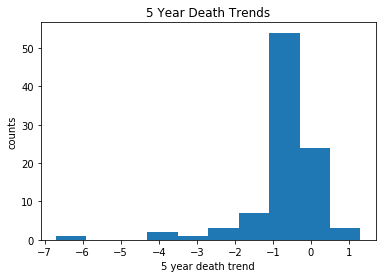

In [15]:
plt.hist(pop_and_cancer.recent_5yr_trend);
plt.xlabel('5 year death trend')
plt.ylabel('counts') 
plt.title('5 Year Death Trends')

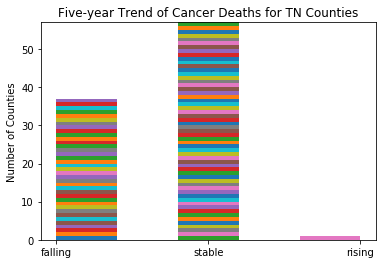

In [13]:
plt.hist(pop_and_cancer.recent_trend, bins = 5, stacked = True)
plt.title('Five-year Trend of Cancer Deaths for TN Counties')
plt.ylabel('Number of Counties')
plt.show()

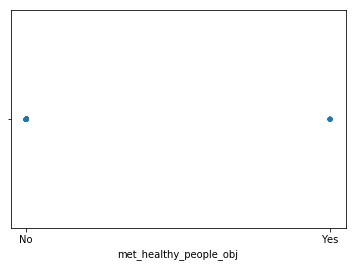

In [16]:
sns.stripplot(pop_and_cancer.met_healthy_people_obj)

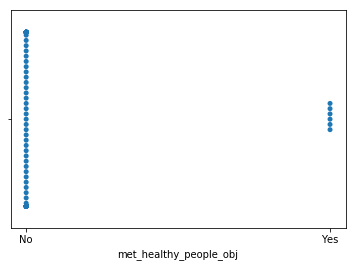

In [17]:
sns.swarmplot(pop_and_cancer.met_healthy_people_obj)

Text(0.5,1,'Counties Meeting Healthy People Objective')

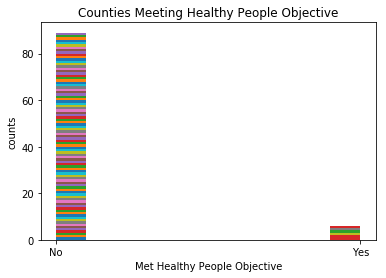

In [14]:
plt.hist(pop_and_cancer.met_healthy_people_obj, stacked = True);
plt.xlabel('Met Healthy People Objective')
plt.ylabel('counts') 
plt.title('Counties Meeting Healthy People Objective')

Text(0.5,1,'Counties Meeting Healthy People Objective')

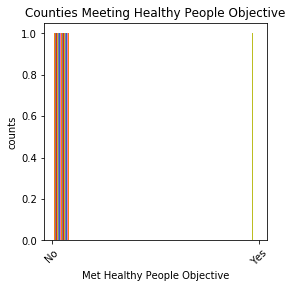

In [28]:
plt.figure(figsize=(4,4))
plt.xticks(rotation=45)
plt.hist(pop_and_cancer.met_healthy_people_obj);
plt.xlabel('Met Healthy People Objective')
plt.ylabel('counts') 
plt.title('Counties Meeting Healthy People Objective')

In [30]:
pop_and_cancer.query("hospice_count>2")

,county,pop2010all,pop2014all,pop2017all,pop2010_50to54,pop2014_50to54,pop2017_50to54,pop2010_55to59,pop2014_55to59,pop2017_55to59,...,met_healthy_people_obj,age_adjust_death_rate,death_lower_95_CI,death_upper_95_CI,avg_ann_count,recent_trend,recent_5yr_trend,5yr_lower_95_CI,5yr_upper_95_CI,hospice_count
18,Davidson,627973,670314,691243,42340,43565,40889,37772,41623,41751,...,No,184.7,179.8,189.7,1137,falling,-1.5,-1.7,-1.2,8
32,Hamilton,337262,350602,361613,25237,24725,23736,23644,24948,24791,...,No,172.6,167.0,178.3,743,stable,0.1,-1.5,1.8,5
46,Knox,432972,447939,461860,30819,31248,29955,28163,29577,29921,...,No,177.4,172.1,182.8,890,falling,-1.0,-1.2,-0.8,5
78,Shelby,928552,938434,936961,66350,64536,59532,59228,62411,60997,...,No,195.0,190.8,199.2,1767,falling,-1.1,-1.2,-1.0,5


In [38]:
pop_over_50_2010 = [col for col in pop_and_cancer.columns if (col.find('pop2010_') != -1)]

In [39]:
print(pop_over_50_2010)

['pop2010_50to54', 'pop2010_55to59', 'pop2010_60to64', 'pop2010_65to69', 'pop2010_70to74', 'pop2010_75to79', 'pop2010_80to84', 'pop2010_85over']


In [41]:
pop_over_50_sum <- pop_and_cancer.cumsum(axis=pop_over_50_2010)

NameError: name 'pop_over_50_sum' is not defined

In [1]:
import pandas as pd

In [2]:
pop_and_cancer = pd.read_csv('pop_and_cancer_w_hospice_counts_simplified_10_9_18.csv')

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

Text(0.5,1,'Relationship between aging population and cancer')

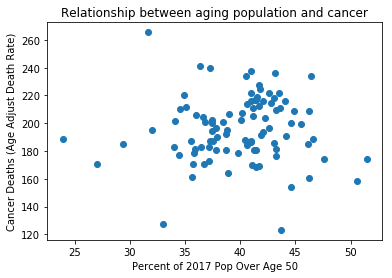

In [7]:
plt.scatter(pop_and_cancer.percent_pop2017_50_and_over, pop_and_cancer.age_adjust_death_rate);
plt.xlabel('Percent of 2017 Pop Over Age 50')
plt.ylabel('Cancer Deaths (Age Adjust Death Rate)') 
plt.title('Relationship between aging population and cancer')

Text(0.5,1,'Relationship between aging population and hospice rates')

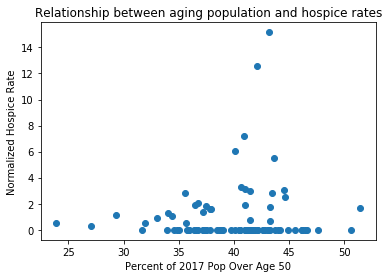

In [8]:
plt.scatter(pop_and_cancer.percent_pop2017_50_and_over, pop_and_cancer.normalized_hospice_rate);
plt.xlabel('Percent of 2017 Pop Over Age 50')
plt.ylabel('Normalized Hospice Rate') 
plt.title('Relationship between aging population and hospice rates')

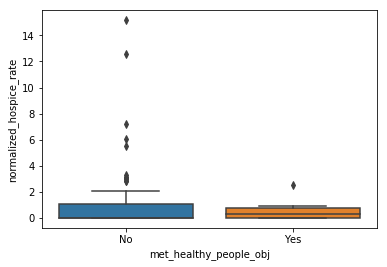

In [9]:
sns.boxplot(x="met_healthy_people_obj", y="normalized_hospice_rate",
            data=pop_and_cancer)


Text(0.5,1,'Relationship between aging population and 5 year cancer rate trend')

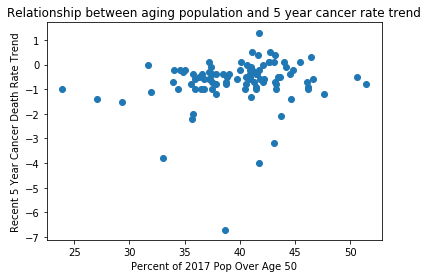

In [6]:
plt.scatter(pop_and_cancer.percent_pop2017_50_and_over, pop_and_cancer.recent_5yr_trend);
plt.xlabel('Percent of 2017 Pop Over Age 50')
plt.ylabel('Recent 5 Year Cancer Death Rate Trend') 
plt.title('Relationship between aging population and 5 year cancer rate trend')

Text(0,0.5,'5 Year Cancer Deaths Trend')

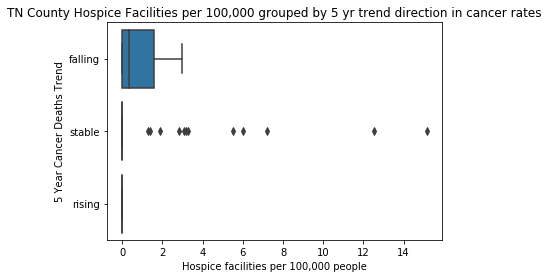

In [8]:
sns.boxplot(x = pop_and_cancer.normalized_hospice_rate, y = pop_and_cancer.recent_trend)
plt.title('TN County Hospice Facilities per 100,000 grouped by 5 yr trend direction in cancer rates')
plt.xlabel('Hospice facilities per 100,000 people')
plt.ylabel('5 Year Cancer Deaths Trend')

Text(0.5,1,'Cancer Death Rates in TN Counties Plotted by Recent 5 Year Trend')

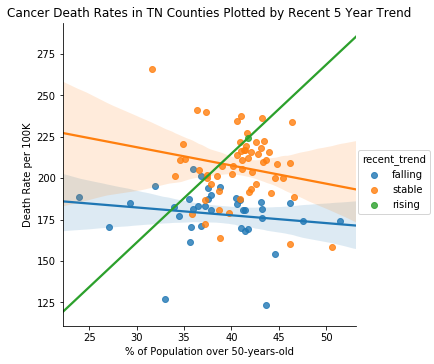

In [10]:
sns.lmplot(x = 'percent_pop2017_50_and_over', y = 'age_adjust_death_rate', data = pop_and_cancer, hue='recent_trend')
plt.xlabel('% of Population over 50-years-old')
plt.ylabel('Death Rate per 100K')
plt.title('Cancer Death Rates in TN Counties Plotted by Recent 5 Year Trend')

Text(0.5,1,'Cancer Death Rates in TN Counties Plotted by Recent 5 Year Trend')

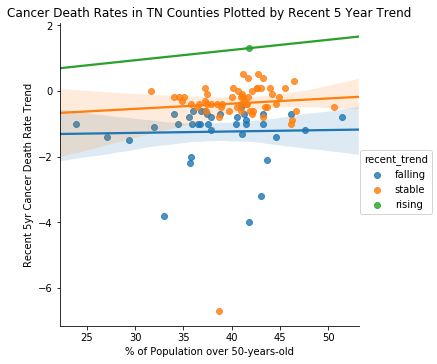

In [11]:
sns.lmplot(x = 'percent_pop2017_50_and_over', y = 'recent_5yr_trend', data = pop_and_cancer, hue='recent_trend')
plt.xlabel('% of Population over 50-years-old')
plt.ylabel('Recent 5yr Cancer Death Rate Trend')
plt.title('Cancer Death Rates in TN Counties Plotted by Recent 5 Year Trend')